# Resale Condo Price Analysis
### URA 5-year Historical Price Data

In [1]:
import os, sys
import re, json
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from glob import glob
import plotly.graph_objs as go

from analysis_utils import *

%matplotlib inline
pd.set_option('display.max_columns',300)
pd.set_option('display.max_rows',2000)

In [2]:
latest_file_path = glob(os.path.join('.','output','*.xlsx'))[-1]
condo = pd.read_excel(latest_file_path)

In [3]:
condo.head()

,Project Name,Street Name,Type,Postal District,Market Segment,Tenure,Type of Sale,No. of Units,Price,Nett Price,Area (Sqft),Type of Area,Floor Level,Unit Price ($psf),Date of Sale
0,# 1 LOFT,LORONG 24 GEYLANG,Apartment,14,RCR,Freehold,Resale,1,985000,-,936,Strata,06 to 10,1052,Apr-20
1,# 1 LOFT,LORONG 24 GEYLANG,Apartment,14,RCR,Freehold,Resale,1,615000,-,549,Strata,06 to 10,1120,Dec-19
2,# 1 LOFT,LORONG 24 GEYLANG,Apartment,14,RCR,Freehold,Resale,1,675000,-,570,Strata,01 to 05,1183,Sep-19
3,# 1 LOFT,LORONG 24 GEYLANG,Apartment,14,RCR,Freehold,Resale,1,668000,-,581,Strata,06 to 10,1149,Jun-19
4,# 1 LOFT,LORONG 24 GEYLANG,Apartment,14,RCR,Freehold,Resale,1,660000,-,570,Strata,01 to 05,1157,Jan-19


In [4]:
condo_bak = condo.copy()

In [5]:
# condo = condo_bak.copy()

In [6]:
condo['Date of Sale'] = condo['Date of Sale'].apply(lambda x: datetime.strptime(x, '%b-%y'))
condo['Date of Sale (mon-year)'] = condo['Date of Sale'].apply(lambda x: datetime.strftime(x,'%b-%y'))
condo['Year of Sale'] = condo['Date of Sale'].dt.year

condo['Psf'] = np.round(condo['Price']/condo['Area (Sqft)'])

In [7]:
condo.head()

,Project Name,Street Name,Type,Postal District,Market Segment,Tenure,Type of Sale,No. of Units,Price,Nett Price,Area (Sqft),Type of Area,Floor Level,Unit Price ($psf),Date of Sale,Date of Sale (mon-year),Year of Sale,Psf
0,# 1 LOFT,LORONG 24 GEYLANG,Apartment,14,RCR,Freehold,Resale,1,985000,-,936,Strata,06 to 10,1052,2020-04-01,Apr-20,2020,1052.0
1,# 1 LOFT,LORONG 24 GEYLANG,Apartment,14,RCR,Freehold,Resale,1,615000,-,549,Strata,06 to 10,1120,2019-12-01,Dec-19,2019,1120.0
2,# 1 LOFT,LORONG 24 GEYLANG,Apartment,14,RCR,Freehold,Resale,1,675000,-,570,Strata,01 to 05,1183,2019-09-01,Sep-19,2019,1184.0
3,# 1 LOFT,LORONG 24 GEYLANG,Apartment,14,RCR,Freehold,Resale,1,668000,-,581,Strata,06 to 10,1149,2019-06-01,Jun-19,2019,1150.0
4,# 1 LOFT,LORONG 24 GEYLANG,Apartment,14,RCR,Freehold,Resale,1,660000,-,570,Strata,01 to 05,1157,2019-01-01,Jan-19,2019,1158.0


## Analyzing a specific condo project

In [8]:
condo.loc[condo['Project Name'].str.contains('REGENT', na=False),'Project Name'].unique()

array(['EWE BOON REGENT', 'REGENT GROVE', 'REGENT HEIGHTS', 'REGENT PARK',
       'REGENT RESIDENCES', 'REGENT VILLAS', 'REGENTVILLE'], dtype=object)

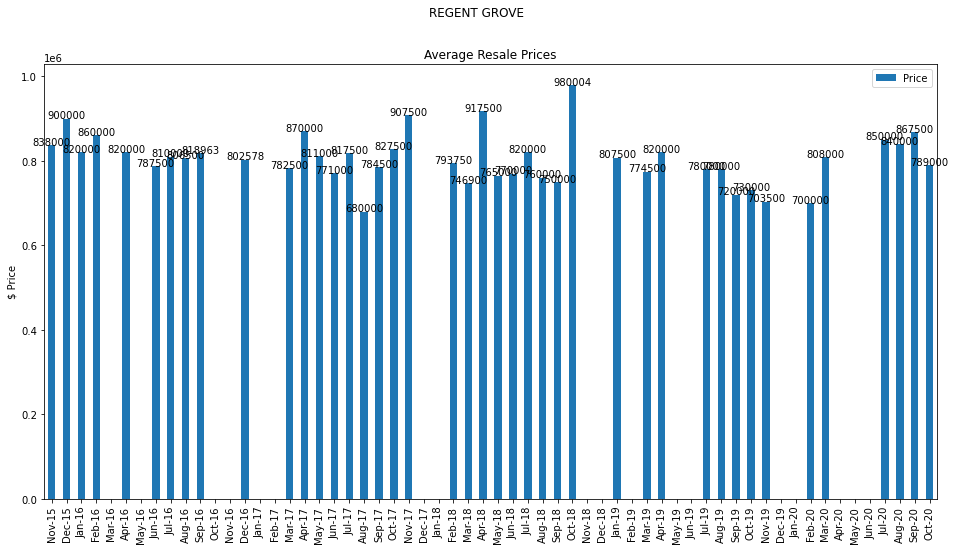

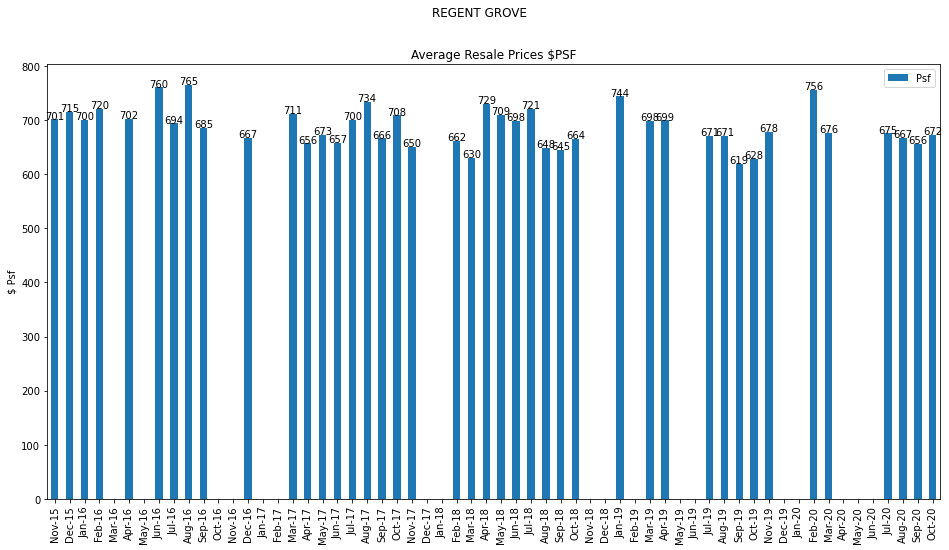

Year of Sale,2015,2016,2017,2018,2019,2020
Floor Level,,,,,,
01 to 05,-,705.0,659.0,658.0,623.5,639.0
06 to 10,708,699.0,691.0,705.0,721.5,675.5
11 to 15,-,673.0,705.0,701.0,701,676.5
16 to 20,-,711.0,610.0,674.5,-,647.0


In [9]:
mycondoname = 'REGENT GROVE'
mycondo = condo[condo['Project Name'].isin([mycondoname])]

date_idx = pd.date_range(start=condo['Date of Sale'].min(), end=condo['Date of Sale'].max(), freq='M')
date_idx = date_idx.map(lambda x: datetime.strftime(x, '%b-%y'))

#### Average Total Price

showAvgResalePrice(mycondo, date_idx)

#### Average Psf

showAvgPsf(mycondo, date_idx)

np.round(mycondo.pivot_table(index='Floor Level', columns='Year of Sale', values='Psf', aggfunc='median').fillna('-'),2)

## Analyzing a specific condo project

In [23]:
condo_name = 'MAYSPRINGS'
condo.loc[condo['Project Name'].str.contains(condo_name.upper(), na=False),'Project Name'].unique()

array(['MAYSPRINGS'], dtype=object)

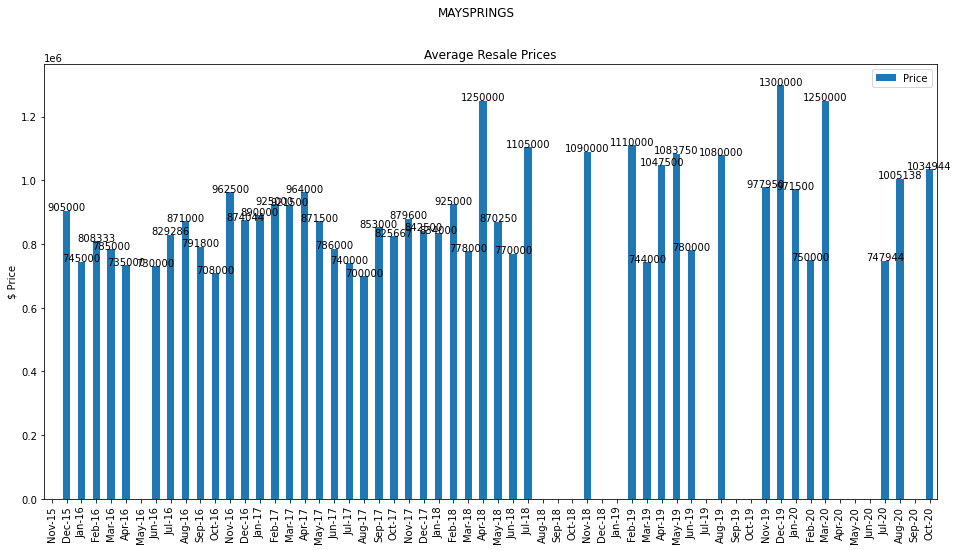

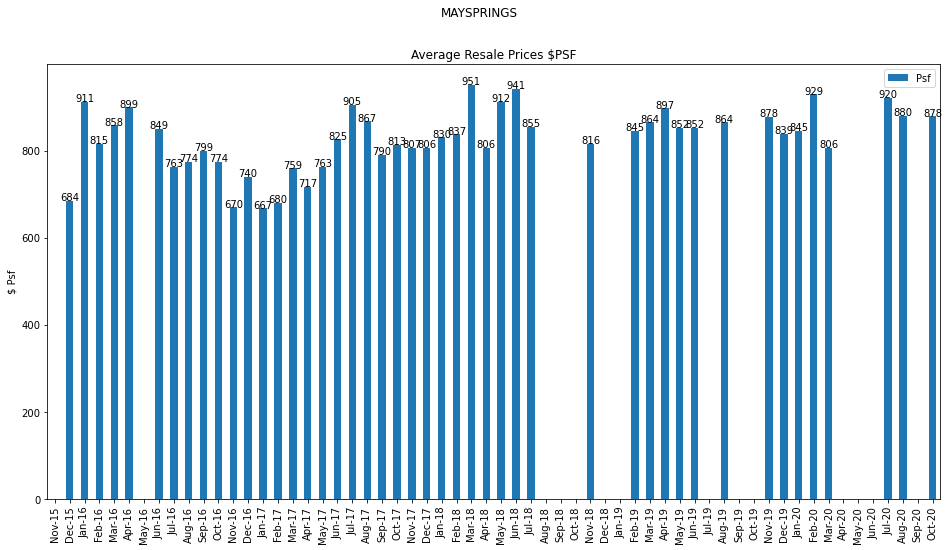

Year of Sale,2015,2016,2017,2018,2019,2020
Floor Level,,,,,,
01 to 05,684,816.0,697.0,838,866.0,863.0
06 to 10,-,836.5,802.0,841.5,855.5,884.5
11 to 15,-,828.5,825.0,896,851.0,876.5
16 to 20,-,830.0,748.5,816,864.0,891.5
21 to 25,-,660.0,704.5,-,896.0,806.0


In [24]:
mycondoname = 'MAYSPRINGS'
mycondo = condo[condo['Project Name'].isin([mycondoname])]

#### Average Total Price

showAvgResalePrice(mycondo, date_idx)

#### Average Psf

showAvgPsf(mycondo, date_idx)

np.round(mycondo.pivot_table(index='Floor Level', columns='Year of Sale', values='Psf', aggfunc='median').fillna('-'),2)

## Analyze condo projects by district(s)

#### YoY Psf % Growth

In [27]:
# Filters
# price_max = 1000000
min_sqft = 900
district = 21 # Upper Bukit Timah, Ulu Pandan, Clementi Park

,YoY Psf Change 100%,Average 5-year Price
Project Name,,
GOODLUCK GARDEN,1.491238,56739545.0
MAYFAIR GARDENS,1.325000,8645779.0
KISMIS COURT,1.185910,1190000.0
KAP RESIDENCES,1.177191,1757667.0
ASTOR GREEN,1.160138,1415615.0
HIGHGATE,1.130069,1601636.0
THE STERLING,1.127275,2248111.0
PINE GROVE,1.122994,1308056.0
THE CASCADIA,1.115024,2113340.0


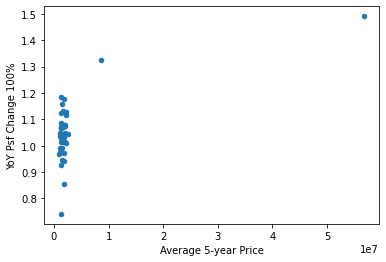

In [28]:
mycondos = condo[(condo['Postal District'].isin([district]))\
                 &(condo.Type.isin(['Executive Condominium', 'Apartment','Condominium']))\
                 &(condo['Area (Sqft)']>min_sqft)\
                 &(condo['Year of Sale']!=2020)
                ]

mycondos_prices = mycondos.pivot_table(index='Date of Sale', columns='Project Name', values='Psf',\
                                      aggfunc='median')
mycondos_prices

average_prices = mycondos.groupby('Project Name').agg({'Price':'mean'})
average_prices = round(average_prices)
average_prices.columns = ['Average 5-year Price']

df_yoy = pd.DataFrame(np.mean(mycondos_prices/mycondos_prices.shift(12)).sort_values(ascending=False))
df_yoy.columns = ['YoY Psf Change 100%']
df_yoy = pd.merge(df_yoy,average_prices,left_index=True,right_index=True)

df_yoy.plot.scatter(x='Average 5-year Price',y='YoY Psf Change 100%')
df_yoy[~df_yoy.isna()]

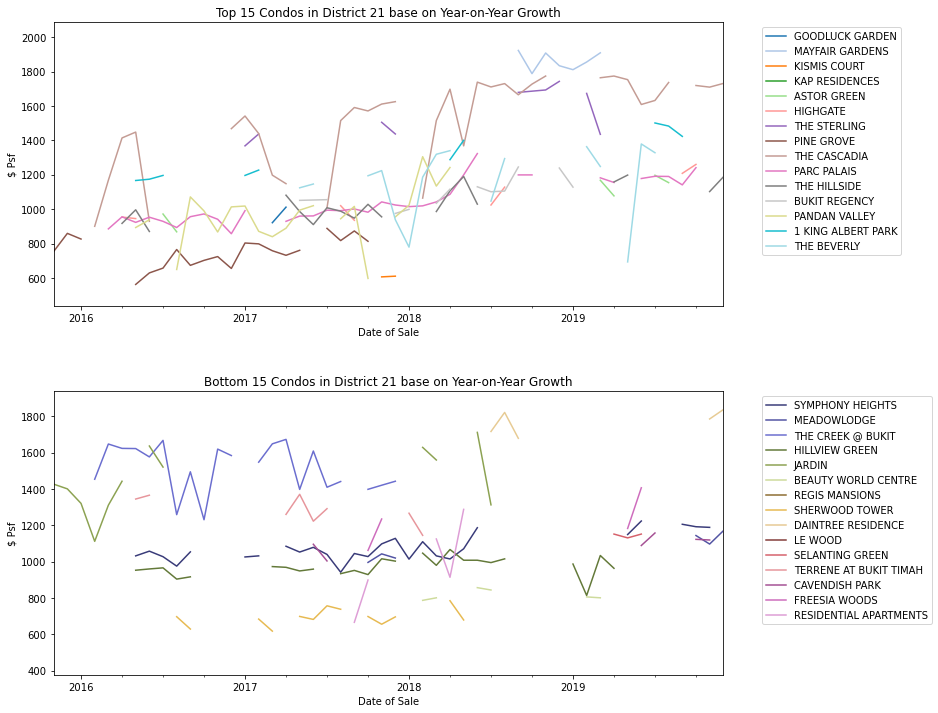

In [30]:
df_yoy = pd.DataFrame(np.mean(mycondos_prices/mycondos_prices.shift(12)).sort_values(ascending=False))
df_yoy.columns = ['YoY Psf Change 100%']
df_yoy = pd.merge(df_yoy,average_prices,left_index=True,right_index=True)

n = 15
topn = df_yoy[~df_yoy['YoY Psf Change 100%'].isna()].head(n).index.tolist()
botn = df_yoy[~df_yoy['YoY Psf Change 100%'].isna()].tail(n).index.tolist()

fig, (ax1, ax2) = plt.subplots(2, 1)

df=mycondos_prices.loc[:,topn]
df.plot(kind='line', figsize=(12,12), ax=ax1, cmap='tab20')
ax1.set_ylabel('$ Psf')
ax1.legend(bbox_to_anchor=(1.05,1))
ax1.set_title(f"Top {n} Condos in District {district} base on Year-on-Year Growth")

df=mycondos_prices.loc[:,botn]
df.plot(kind='line', figsize=(12,12), ax=ax2, cmap='tab20b')
ax2.set_ylabel('$ Psf')
ax2.legend(bbox_to_anchor=(1.05,1))
ax2.set_title(f"Bottom {n} Condos in District {district} base on Year-on-Year Growth")
plt.subplots_adjust(hspace=0.3)
plt.show()

In [31]:
# Filters
# price_max = 1000000
min_sqft = 900
district = 22 # Boon Lay, Jurong, Tuas

,YoY Psf Change 100%,Average 5-year Price
Project Name,,
LAKEPOINT CONDOMINIUM,1.240311,1206353.0
IVORY HEIGHTS,1.085735,1394043.0
LAKEHOLMZ,1.044135,1175503.0
LAKE GRANDE,1.036955,1357772.0
CASPIAN,1.034629,1314812.0
THE LAKEFRONT RESIDENCES,1.030832,1392279.0
J GATEWAY,1.030363,1586250.0
THE CENTRIS,1.024228,1312498.0
PARC VISTA,1.022583,970414.0


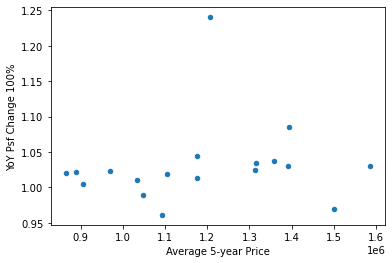

In [32]:
mycondos = condo[(condo['Postal District'].isin([district]))\
                 &(condo.Type.isin(['Executive Condominium', 'Apartment','Condominium']))\
                 &(condo['Area (Sqft)']>min_sqft)\
                 &(condo['Year of Sale']!=2020)
                ]

mycondos_prices = mycondos.pivot_table(index='Date of Sale', columns='Project Name', values='Psf',\
                                      aggfunc='median')
mycondos_prices

average_prices = mycondos.groupby('Project Name').agg({'Price':'mean'})
average_prices = round(average_prices)
average_prices.columns = ['Average 5-year Price']

df_yoy = pd.DataFrame(np.mean(mycondos_prices/mycondos_prices.shift(12)).sort_values(ascending=False))
df_yoy.columns = ['YoY Psf Change 100%']
df_yoy = pd.merge(df_yoy,average_prices,left_index=True,right_index=True)

df_yoy.plot.scatter(x='Average 5-year Price',y='YoY Psf Change 100%')
df_yoy

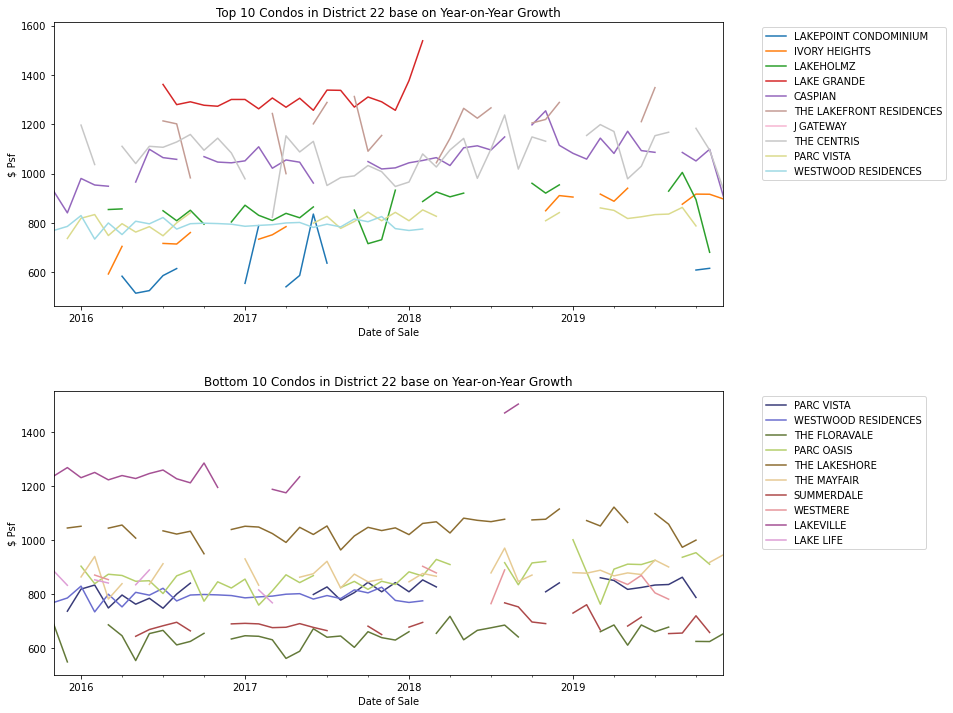

In [33]:
df_yoy = pd.DataFrame(np.mean(mycondos_prices/mycondos_prices.shift(12)).sort_values(ascending=False))
df_yoy.columns = ['YoY Psf Change 100%']
df_yoy = pd.merge(df_yoy,average_prices,left_index=True,right_index=True)

n=10
topn = df_yoy[~df_yoy['YoY Psf Change 100%'].isna()].head(n).index.tolist()
botn = df_yoy[~df_yoy['YoY Psf Change 100%'].isna()].tail(n).index.tolist()

fig, (ax1, ax2) = plt.subplots(2, 1)

df=mycondos_prices.loc[:,topn]
df.plot(kind='line', figsize=(12,12), ax=ax1, cmap='tab20')
ax1.set_ylabel('$ Psf')
ax1.legend(bbox_to_anchor=(1.05,1))
ax1.set_title(f"Top {n} Condos in District {district} base on Year-on-Year Growth")

df=mycondos_prices.loc[:,botn]
df.plot(kind='line', figsize=(12,12), ax=ax2, cmap='tab20b')
ax2.set_ylabel('$ Psf')
ax2.legend(bbox_to_anchor=(1.05,1))
ax2.set_title(f"Bottom {n} Condos in District {district} base on Year-on-Year Growth")
plt.subplots_adjust(hspace=0.3)
plt.show()

In [34]:
# Filters
price_max = 1000000
min_sqft = 900
district = 23 # Choa Chu Kang, Diary Farm, Hillview, Bukit Panjang, Bukit Batok

,YoY Psf Change 100%,Average 5-year Price
Project Name,,
INZ RESIDENCE,1.165099,886941.0
HILLVIEW PARK,1.119093,1298421.0
THE SKYWOODS,1.109181,1265035.0
HILLVIEW HEIGHTS,1.098134,1386934.0
CHANTILLY RISE,1.096327,1318364.0
WANDERVALE,1.084293,836658.0
GLENDALE PARK,1.080306,1366403.0
THE AMSTON,1.071188,1434417.0
MONTROSA,1.070669,1033556.0


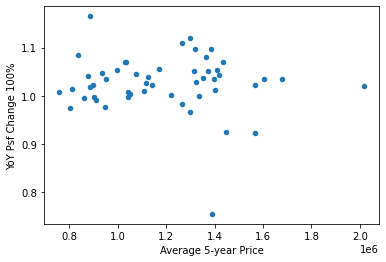

In [35]:
mycondos = condo[(condo['Postal District'].isin([district]))\
                 &(condo.Type.isin(['Executive Condominium', 'Apartment','Condominium']))\
                 &(condo['Area (Sqft)']>min_sqft)\
                 &(condo['Year of Sale']!=2020)
                ]

mycondos_prices = mycondos.pivot_table(index='Date of Sale', columns='Project Name', values='Psf',\
                                      aggfunc='median')
mycondos_prices

average_prices = mycondos.groupby('Project Name').agg({'Price':'mean'})
average_prices = round(average_prices)
average_prices.columns = ['Average 5-year Price']

df_yoy = pd.DataFrame(np.mean(mycondos_prices/mycondos_prices.shift(12)).sort_values(ascending=False))
df_yoy.columns = ['YoY Psf Change 100%']
df_yoy = pd.merge(df_yoy,average_prices,left_index=True,right_index=True)

df_yoy.plot.scatter(x='Average 5-year Price',y='YoY Psf Change 100%')
df_yoy

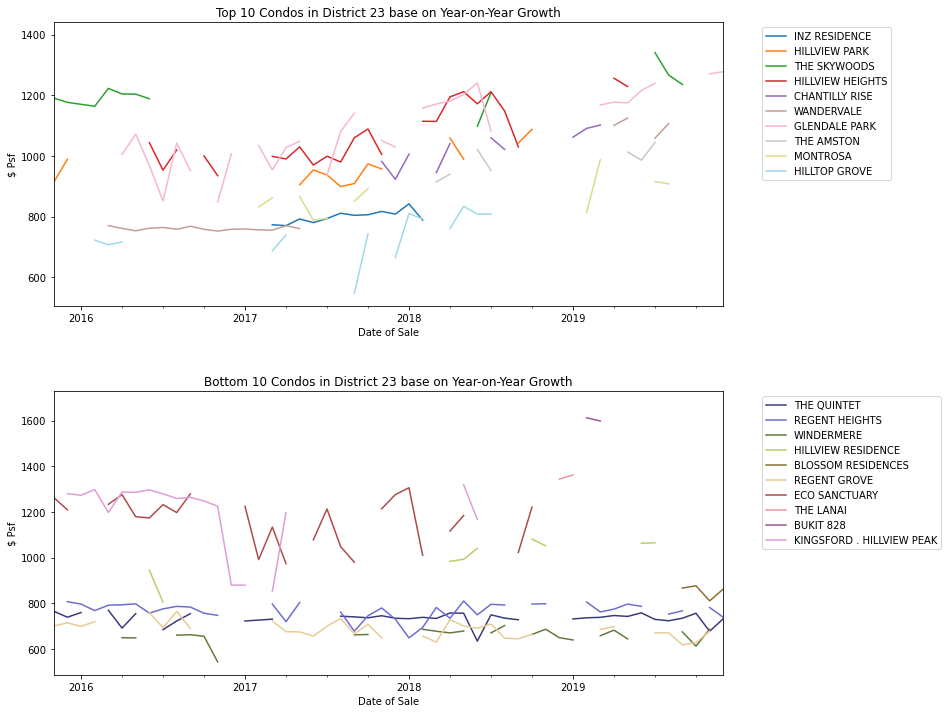

In [36]:
df_yoy = pd.DataFrame(np.mean(mycondos_prices/mycondos_prices.shift(12)).sort_values(ascending=False))
df_yoy.columns = ['YoY Psf Change 100%']
df_yoy = pd.merge(df_yoy,average_prices,left_index=True,right_index=True)

n=10
topn = df_yoy[~df_yoy['YoY Psf Change 100%'].isna()].head(n).index.tolist()
botn = df_yoy[~df_yoy['YoY Psf Change 100%'].isna()].tail(n).index.tolist()

fig, (ax1, ax2) = plt.subplots(2, 1)

df=mycondos_prices.loc[:,topn]
df.plot(kind='line', figsize=(12,12), ax=ax1, cmap='tab20')
ax1.set_ylabel('$ Psf')
ax1.legend(bbox_to_anchor=(1.05,1))
ax1.set_title(f"Top {n} Condos in District {district} base on Year-on-Year Growth")

df=mycondos_prices.loc[:,botn]
df.plot(kind='line', figsize=(12,12), ax=ax2, cmap='tab20b')
ax2.set_ylabel('$ Psf')
ax2.legend(bbox_to_anchor=(1.05,1))
ax2.set_title(f"Bottom {n} Condos in District {district} base on Year-on-Year Growth")
plt.subplots_adjust(hspace=0.3)
plt.show()

,YoY Psf Change 100%,Average 5-year Price
Project Name,,
JUBILEE RESIDENCE,1.234872,2483600.0
THE ESTIVA,1.199470,1363600.0
LE HILL CONDOMINIUM,1.194431,1266453.0
TREASURE PLACE,1.178797,1580376.0
MONTEREY PARK CONDOMINIUM,1.091648,1614614.0
THE STELLAR,1.082651,1726300.0
PARC RIVIERA,1.078940,1262230.0
CLEMENTIWOODS CONDOMINIUM,1.071156,1686897.0
FLYNN PARK,1.070225,2388481.0


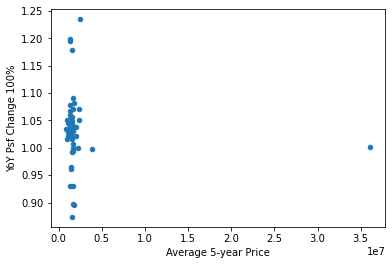

In [25]:
district = 5
mycondos = condo[(condo['Postal District'].isin([district]))\
                 &(condo.Type.isin(['Executive Condominium', 'Apartment','Condominium']))\
                 &(condo['Area (Sqft)']>min_sqft)\
                 &(condo['Year of Sale']!=2020)
                ]

mycondos_prices = mycondos.pivot_table(index='Date of Sale', columns='Project Name', values='Psf',\
                                      aggfunc='median')
mycondos_prices

average_prices = mycondos.groupby('Project Name').agg({'Price':'mean'})
average_prices = round(average_prices)
average_prices.columns = ['Average 5-year Price']

df_yoy = pd.DataFrame(np.mean(mycondos_prices/mycondos_prices.shift(12)).sort_values(ascending=False))
df_yoy.columns = ['YoY Psf Change 100%']
df_yoy = pd.merge(df_yoy,average_prices,left_index=True,right_index=True)

df_yoy.plot.scatter(x='Average 5-year Price',y='YoY Psf Change 100%')
df_yoy

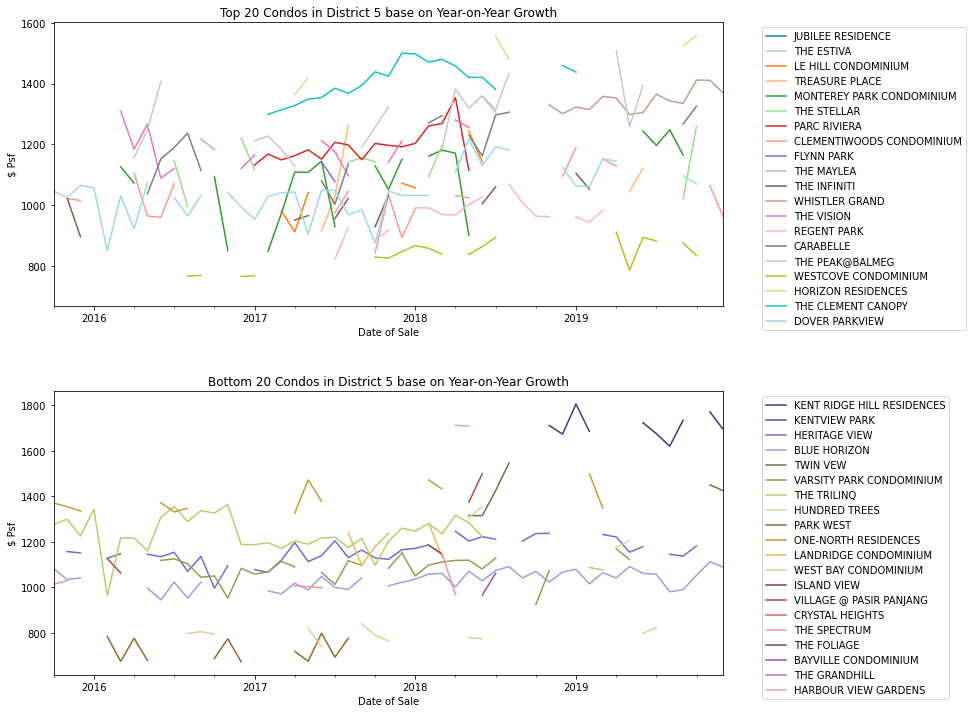

In [28]:
df_yoy = pd.DataFrame(np.mean(mycondos_prices/mycondos_prices.shift(12)).sort_values(ascending=False))
df_yoy.columns = ['YoY Psf Change 100%']
df_yoy = pd.merge(df_yoy,average_prices,left_index=True,right_index=True)

top20 = df_yoy[~df_yoy['YoY Psf Change 100%'].isna()].head(20).index.tolist()
bot20 = df_yoy[~df_yoy['YoY Psf Change 100%'].isna()].tail(20).index.tolist()

fig, (ax1, ax2) = plt.subplots(2, 1)

df=mycondos_prices.loc[:,top20]
df.plot(kind='line', figsize=(12,12), ax=ax1, cmap='tab20')
ax1.set_ylabel('$ Psf')
ax1.legend(bbox_to_anchor=(1.05,1))
ax1.set_title(f"Top 20 Condos in District {district} base on Year-on-Year Growth")

df=mycondos_prices.loc[:,bot20]
df.plot(kind='line', figsize=(12,12), ax=ax2, cmap='tab20b')
ax2.set_ylabel('$ Psf')
ax2.legend(bbox_to_anchor=(1.05,1))
ax2.set_title(f"Bottom 20 Condos in District {district} base on Year-on-Year Growth")
plt.subplots_adjust(hspace=0.3)
plt.show()

In [29]:
mycondos_prices = mycondos.pivot_table(index='Date of Sale (mon-year)', columns='Project Name', values='Psf',\
                                      aggfunc='mean')


# mycondos_prices = mycondos_prices.set_index('Date of Sale (mon-year)')
mycondos_prices = mycondos_prices.reindex(date_idx, fill_value=0)

mycondos_prices

# ax = mycondos_prices.plot(kind='line', stacked=False, figsize=(16,8), title='Average Resale Prices')
# ax.legend(bbox_to_anchor=(1, 1))
# for p in ax.patches:
#     width, height = p.get_width(), p.get_height()
#     x, y = p.get_xy() 
#     if height > 0 and height < np.inf:
#         ax.annotate(int(round(height)),\
#                     (x+width/2, y+height+1),\
#                     ha='center', va='center', xytext=(0, 3), textcoords='offset points')
# ax.set_ylabel('$ Price')
# plt.show()

Project Name,24 ONE RESIDENCES,BANYAN CONDOMINIUM,BAYVILLE CONDOMINIUM,BIJOU,BLUE HORIZON,BOTANNIA,BUONA LODGE,BUONA VISTA GARDENS,CARABELLE,CLEMENTIWOODS CONDOMINIUM,CRYSTAL HEIGHTS,DOVER PARKVIEW,FABER CREST,FABER HILLS,FLYNN PARK,FRAGRANCE COURT,GLORIA MANSION,GOLD COAST CONDOMINIUM,HARBOUR VIEW GARDENS,HERITAGE VIEW,HORIZON RESIDENCES,HUNDRED TREES,ISLAND VIEW,JUBILEE RESIDENCE,KENT RIDGE HILL RESIDENCES,KENTVIEW PARK,LANDRIDGE CONDOMINIUM,LE HILL CONDOMINIUM,LIIV RESIDENCES,LOTUS AT PASIR PANJANG,LUXE VILLE,MENDON SPRING,MONTEREY PARK CONDOMINIUM,MURANO,NEWEST,NORMANTON PARK,ONE-NORTH RESIDENCES,PALM GREEN,PALM MANSIONS,PARC CLEMATIS,PARC IMPERIAL,PARC REGENCY,PARC RIVIERA,PARK WEST,PASIR PANJANG COURT,PASIR PANJANG LODGE,PASIR VIEW PARK,PEPYS HILL CONDOMINIUM,REGENT PARK,RESIDENTIAL APARTMENTS,RIA APARTMENTS,SARHAD VILLE,SEAHILL,THE CLEMENT CANOPY,THE ESTIVA,THE FOLIAGE,THE GRANDHILL,THE INFINITI,THE MAYLEA,THE ORIENT,THE PARC CONDOMINIUM,THE PEAK,THE PEAK@BALMEG,THE ROCHESTER RESIDENCES,THE SPECTRUM,THE STELLAR,THE TRILINQ,THE VERANDAH RESIDENCES,THE VISION,TREASURE PLACE,TWIN VEW,VARSITY PARK CONDOMINIUM,VENTANA,VILLA DE WEST,VILLAGE @ PASIR PANJANG,VISTA PARK,WATERFRONT @ FABER,WEST BAY CONDOMINIUM,WEST PARK REGENCY,WEST-N,WESTCOVE CONDOMINIUM,WHISTLER GRAND,WHITEHAVEN
Oct-15,NaN,NaN,NaN,NaN,1083.000000,912.500000,NaN,NaN,NaN,NaN,NaN,1046.000000,826.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1371.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1205.000000,NaN,1283.000000,NaN,1014.0,NaN,1277.000000,NaN,1291.0,NaN,NaN,NaN,NaN,NaN,1200.000000,NaN,1166.800000,NaN,NaN,NaN,823.00,NaN,NaN
Nov-15,NaN,NaN,NaN,NaN,1035.000000,1140.500000,NaN,NaN,NaN,1022.000000,NaN,1025.000000,826.000000,NaN,NaN,NaN,962.0,NaN,NaN,1158.000000,1535.0,NaN,1012.0,NaN,NaN,NaN,NaN,996.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1355.000000,NaN,876.0,NaN,NaN,NaN,NaN,699.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1024.0,NaN,NaN,NaN,NaN,NaN,NaN,1030.0,NaN,1295.200000,NaN,NaN,NaN,NaN,1217.000000,NaN,NaN,NaN,NaN,1156.500000,839.0,NaN,NaN,NaN,NaN,NaN
Dec-15,NaN,NaN,NaN,NaN,1043.333333,1154.000000,NaN,902.0,NaN,1015.000000,NaN,1065.000000,957.000000,NaN,NaN,NaN,NaN,NaN,NaN,1152.000000,NaN,802.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1337.666667,911.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,896.0,NaN,NaN,1263.000000,NaN,NaN,NaN,NaN,NaN,1223.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1174.333333,NaN,NaN,NaN,734.00,NaN,1058.0
Jan-16,NaN,NaN,NaN,NaN,NaN,1069.000000,NaN,NaN,NaN,NaN,NaN,1057.000000,849.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1344.000000,NaN,1167.0,NaN,NaN,NaN,1098.0,NaN,NaN,NaN,1169.000000,NaN,NaN,NaN,NaN,NaN,NaN
Feb-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,850.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1129.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1371.000000,NaN,NaN,NaN,NaN,NaN,NaN,785.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1027.0,NaN,NaN,NaN,1229.000000,NaN,NaN,NaN,NaN,NaN,964.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1142.333333,NaN,1159.000000,NaN,NaN,NaN,NaN,NaN,NaN
Mar-16,NaN,NaN,NaN,NaN,NaN,1018.500000,NaN,NaN,1120.00,NaN,NaN,1031.000000,NaN,NaN,NaN,NaN,NaN,950.0,NaN,1148.500000,NaN,1267.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1126.000000,NaN,NaN,NaN,NaN,924.0,884.0,NaN,NaN,NaN,NaN,675.000000,NaN,NaN,NaN,NaN,860.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,961.5,NaN,NaN,1054.333333,NaN,NaN,NaN,NaN,NaN,1226.000000,NaN,1310.0,NaN,NaN,NaN,NaN,1077.0,1064.000000,NaN,1146.625000,NaN,1062.0,NaN,NaN,NaN,NaN
Apr-16,NaN,NaN,NaN,NaN,NaN,1087.000000,NaN,NaN,NaN,1105.000000,1197.0,926.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1073.0000